In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
42,1000.0,0.604100,pca_gdf_que3,0.001,0.187905,0.191102,0.593711,11946,0.632794,0.200535,0.201271,0.599921,0.1,1.0
16,0.1,0.594523,pca_gdf_que3,0.100,0.182453,0.183835,0.591498,3879,0.575435,0.122216,0.122692,0.561159,0.1,1.0
38,100.0,0.596202,pca_gdf_que3,1.000,0.168391,0.169863,0.584201,3035,0.575095,0.103686,0.103828,0.551772,0.1,1.0
35,100.0,0.570434,pca_gdf_que3,0.001,0.162383,0.163781,0.581383,7858,0.530425,0.173911,0.176532,0.586311,0.1,1.0
36,100.0,0.628649,pca_gdf_que3,0.010,0.152635,0.161718,0.576450,13061,0.642105,0.094994,0.102277,0.546556,0.1,1.0
17,0.1,0.598280,pca_gdf_que3,1.000,0.151906,0.159219,0.576036,1956,0.611311,0.134272,0.138172,0.567191,0.1,1.0
16,0.1,0.580595,pca_gdf_que3,0.100,0.149325,0.159088,0.574649,4320,0.638015,0.173926,0.176160,0.586271,0.1,1.0
30,10.0,0.563001,pca_gdf_que3,0.100,0.151053,0.158577,0.575905,12417,0.588121,0.154291,0.154787,0.577223,0.1,1.0
38,100.0,0.584928,pca_gdf_que3,1.000,0.154812,0.157235,0.577658,9761,0.603670,0.133741,0.135408,0.566740,0.1,1.0
35,100.0,0.611943,pca_gdf_que3,0.001,0.155394,0.156893,0.577441,10484,0.567673,0.113104,0.113672,0.556679,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm','test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.186824,0.201271,0.203627,0.593711,0.592373,0.599921,0.601087,11946
1,0.183835,0.178656,0.122692,0.120812,0.591498,0.588843,0.561159,0.560288,3879
2,0.169863,0.167115,0.103828,0.099310,0.584201,0.583085,0.551772,0.549537,3035
3,0.163781,0.146384,0.176532,0.171235,0.581383,0.572852,0.586311,0.584512,7858
4,0.161718,0.143094,0.102277,0.110004,0.576450,0.571097,0.546556,0.555039,13061
5,0.159219,0.152838,0.138172,0.133788,0.576036,0.574598,0.567191,0.566273,1956
6,0.159088,0.156657,0.176160,0.163789,0.574649,0.577752,0.586271,0.581178,4320
7,0.158577,0.150172,0.154787,0.154446,0.575905,0.573432,0.577223,0.576707,12417
8,0.157235,0.144700,0.135408,0.132214,0.577658,0.571695,0.566740,0.564652,9761
9,0.156893,0.158982,0.113672,0.103611,0.577441,0.578350,0.556679,0.551208,10484


In [9]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

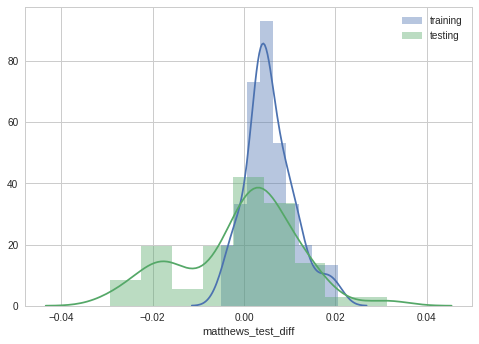

In [10]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

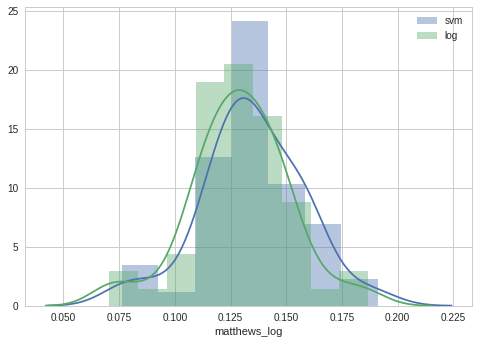

In [11]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [12]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(0.3019326064477755, -0.040255954492383)

In [13]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(46, 31, 53)

In [14]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.186824,0.201271,0.203627,0.593711,0.592373,0.599921,0.601087,11946
4,0.161718,0.143094,0.102277,0.110004,0.576450,0.571097,0.546556,0.555039,13061
10,0.154583,0.142170,0.113372,0.130087,0.574610,0.570308,0.548113,0.562736,12255
11,0.153835,0.148600,0.114780,0.118223,0.575346,0.572888,0.554607,0.557251,1472
12,0.153509,0.142499,0.157434,0.162155,0.574456,0.570582,0.578408,0.580693,10508
15,0.148576,0.145601,0.130367,0.153016,0.573383,0.572127,0.565153,0.576301,11869
16,0.144766,0.141614,0.104201,0.105515,0.571746,0.569281,0.551862,0.552729,2813
19,0.139798,0.137272,0.147294,0.168692,0.569358,0.567489,0.573608,0.583011,3161
24,0.135072,0.131577,0.132628,0.150530,0.563604,0.564686,0.556675,0.570781,2602
27,0.132814,0.125630,0.117727,0.143575,0.563687,0.561209,0.555870,0.570249,1907


In [15]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(40, 30, 53)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.186824,0.201271,0.203627,0.593711,0.592373,0.599921,0.601087,11946
4,0.161718,0.143094,0.102277,0.110004,0.576450,0.571097,0.546556,0.555039,13061
10,0.154583,0.142170,0.113372,0.130087,0.574610,0.570308,0.548113,0.562736,12255
11,0.153835,0.148600,0.114780,0.118223,0.575346,0.572888,0.554607,0.557251,1472
12,0.153509,0.142499,0.157434,0.162155,0.574456,0.570582,0.578408,0.580693,10508
15,0.148576,0.145601,0.130367,0.153016,0.573383,0.572127,0.565153,0.576301,11869
16,0.144766,0.141614,0.104201,0.105515,0.571746,0.569281,0.551862,0.552729,2813
19,0.139798,0.137272,0.147294,0.168692,0.569358,0.567489,0.573608,0.583011,3161
24,0.135072,0.131577,0.132628,0.150530,0.563604,0.564686,0.556675,0.570781,2602
27,0.132814,0.125630,0.117727,0.143575,0.563687,0.561209,0.555870,0.570249,1907


In [17]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.191102,0.186824,0.201271,0.203627,0.593711,0.592373,0.599921,0.601087,11946
4,0.161718,0.143094,0.102277,0.110004,0.576450,0.571097,0.546556,0.555039,13061
10,0.154583,0.142170,0.113372,0.130087,0.574610,0.570308,0.548113,0.562736,12255
11,0.153835,0.148600,0.114780,0.118223,0.575346,0.572888,0.554607,0.557251,1472
12,0.153509,0.142499,0.157434,0.162155,0.574456,0.570582,0.578408,0.580693,10508
15,0.148576,0.145601,0.130367,0.153016,0.573383,0.572127,0.565153,0.576301,11869
16,0.144766,0.141614,0.104201,0.105515,0.571746,0.569281,0.551862,0.552729,2813
19,0.139798,0.137272,0.147294,0.168692,0.569358,0.567489,0.573608,0.583011,3161
24,0.135072,0.131577,0.132628,0.150530,0.563604,0.564686,0.556675,0.570781,2602
27,0.132814,0.125630,0.117727,0.143575,0.563687,0.561209,0.555870,0.570249,1907
